# Análise Fatorial Exploratória

Nesta atividade iremos trabalho com um conjunto de dados od [ifood](https://www.kaggle.com/datasets/jackdaoud/marketing-data). Este conjunto sofreu um pre tratamento para podermos focar mais na análise fatorial.

## Atividade 1: Importe os dados e verifique se há dados faltantes. Se houver dados faltantes, faça os tratamentos adequados.

In [3]:
# Importando as dependências externas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler

In [4]:
# Carregando os dados
df = pd.read_csv('../2.1_Analise_Multivariada/2.1.4_Analise_Fatorial_Entrega_Dados_iFood.csv')
df.head(2)

,ID,ano_nascimento,nivel_educacao,estado_civil,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,...,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,reclamou_ult_2anos
0,6862,1971,graduado,divorciado,"650,38",0,0,42,65,1,...,3,1,1,15,0,0,0,20,0,0
1,5376,1979,graduado,casado,"919,92",1,0,539,42,1,...,1725,1,1,15,0,28,0,1,0,0


In [6]:
# Visualizando e avaliando a necessidade de tratamento dos dados 1de2
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2236.0,5591.551878,3245.240106,0.0,2828.25,5458.5,8427.75,11191.0
ano_nascimento,2236.0,1968.796512,11.980604,1893.0,1959.00,1970.0,1977.00,1996.0
num_filhos_pequenos,2236.0,0.444991,0.538551,0.0,0.00,0.0,1.00,2.0
num_filhos_adolescentes,2236.0,0.506261,0.544615,0.0,0.00,0.0,1.00,2.0
num_dias_primeira_compra,2236.0,353.335868,202.064179,0.0,180.75,355.0,528.00,699.0
num_dias_ultima_compra,2236.0,49.147138,28.954880,0.0,24.00,49.0,74.00,99.0
gasto_vinho_ult_2anos,2236.0,303.873435,336.876776,0.0,23.00,173.0,505.00,1493.0
gasto_prod_frutas_ult_2anos,2236.0,26.271020,39.761356,0.0,1.00,8.0,33.00,199.0
gasto_prod_carne_ult_2anos,2236.0,166.924419,225.778550,0.0,16.00,67.0,232.00,1725.0
gasto_prod_peixe_ult_2anos,2236.0,37.405188,54.436749,0.0,3.00,12.0,50.00,259.0


In [7]:
# Visualizando e avaliando a necessidade de tratamento dos dados 2de2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            2236 non-null   int64 
 1   ano_nascimento                2236 non-null   int64 
 2   nivel_educacao                2236 non-null   object
 3   estado_civil                  2236 non-null   object
 4   renda_mensal                  2236 non-null   object
 5   num_filhos_pequenos           2236 non-null   int64 
 6   num_filhos_adolescentes       2236 non-null   int64 
 7   num_dias_primeira_compra      2236 non-null   int64 
 8   num_dias_ultima_compra        2236 non-null   int64 
 9   gasto_vinho_ult_2anos         2236 non-null   int64 
 10  gasto_prod_frutas_ult_2anos   2236 non-null   int64 
 11  gasto_prod_carne_ult_2anos    2236 non-null   int64 
 12  gasto_prod_peixe_ult_2anos    2236 non-null   int64 
 13  gasto_prod_doces_u

In [8]:
# Verificando se existem valores faltantes pt. 1 de 2
df.isnull().sum()

ID                              0
ano_nascimento                  0
nivel_educacao                  0
estado_civil                    0
renda_mensal                    0
num_filhos_pequenos             0
num_filhos_adolescentes         0
num_dias_primeira_compra        0
num_dias_ultima_compra          0
gasto_vinho_ult_2anos           0
gasto_prod_frutas_ult_2anos     0
gasto_prod_carne_ult_2anos      0
gasto_prod_peixe_ult_2anos      0
gasto_prod_doces_ulti_2anos     0
qtde_compras_desconto           0
qtde_compras_web_restaurante    0
qtde_compras_catalogo           0
qtde_compras_loja               0
qtde_vistas_web_ult_mes         0
aceitou_qtde_oferta             0
reclamou_ult_2anos              0
dtype: int64

In [9]:
# Verificando se existem valores faltantes pt. 2 de 2
df.isna().sum()

ID                              0
ano_nascimento                  0
nivel_educacao                  0
estado_civil                    0
renda_mensal                    0
num_filhos_pequenos             0
num_filhos_adolescentes         0
num_dias_primeira_compra        0
num_dias_ultima_compra          0
gasto_vinho_ult_2anos           0
gasto_prod_frutas_ult_2anos     0
gasto_prod_carne_ult_2anos      0
gasto_prod_peixe_ult_2anos      0
gasto_prod_doces_ulti_2anos     0
qtde_compras_desconto           0
qtde_compras_web_restaurante    0
qtde_compras_catalogo           0
qtde_compras_loja               0
qtde_vistas_web_ult_mes         0
aceitou_qtde_oferta             0
reclamou_ult_2anos              0
dtype: int64

In [10]:
# Verificando se existem valores duplicados
df.duplicated().sum()

0

## Tratamento dos Dados
A partir da avaliação acima, concluiu-se que não há necessidade de tratamento adicional

## Atividade 2: Faça uma preparação dos dados, isto é, elimine colunas irrelevantes e transforme colunas categóricas em ordinais.

In [11]:
# Listando colunas com dados categóricos
df.select_dtypes(include=['object']).columns

Index(['nivel_educacao', 'estado_civil', 'renda_mensal'], dtype='object')

In [12]:
# Convertendo os valores da coluna renda_mensal para tipo float
df['renda_mensal'] = df['renda_mensal'].str.replace(',', '.').astype(float)
print(f'A coluna \'renda_mensal\' agora é do tipo: {type(df["renda_mensal"][0])}')

A coluna 'renda_mensal' agora é do tipo: <class 'numpy.float64'>


In [13]:
# Visualizando valores únicos na coluna nivel_educacao
df['nivel_educacao'].unique()

array(['graduado', 'doutorado', 'mestrado', 'ensino_medio', 'pos'],
      dtype=object)

In [14]:
# Transformando as colunas categóricas em ordinais - nivel_educacao
df['nivel_educacao'] = df['nivel_educacao'].map({'ensino_medio': 1, 'graduado': 2, 'pos': 3, 'mestrado': 4, 'doutorado': 5})

# Visualizando os dados da coluna
df['nivel_educacao'].head()

0    2
1    2
2    2
3    5
4    2
Name: nivel_educacao, dtype: int64

In [15]:
# Verificando o tipo dos dados na coluna nivel_educacao
df['nivel_educacao'].dtypes

dtype('int64')

In [16]:
# Visualizando nomes das colunas
df.columns

Index(['ID', 'ano_nascimento', 'nivel_educacao', 'estado_civil',
       'renda_mensal', 'num_filhos_pequenos', 'num_filhos_adolescentes',
       'num_dias_primeira_compra', 'num_dias_ultima_compra',
       'gasto_vinho_ult_2anos', 'gasto_prod_frutas_ult_2anos',
       'gasto_prod_carne_ult_2anos', 'gasto_prod_peixe_ult_2anos',
       'gasto_prod_doces_ulti_2anos', 'qtde_compras_desconto',
       'qtde_compras_web_restaurante', 'qtde_compras_catalogo',
       'qtde_compras_loja', 'qtde_vistas_web_ult_mes', 'aceitou_qtde_oferta',
       'reclamou_ult_2anos'],
      dtype='object')

In [17]:
# Eliminando colunas irrelevantes
df.drop(['ID','estado_civil','reclamou_ult_2anos'], axis=1, inplace=True)

# Visualizando dataframe
df.head(2)

,ano_nascimento,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta
0,1971,2,650.38,0,0,42,65,1,1,3,1,1,15,0,0,0,20,0
1,1979,2,919.92,1,0,539,42,1,1,1725,1,1,15,0,28,0,1,0


In [18]:
# Listando tipos de dados das colunas restantes do dataframe
unique_types = df.dtypes.unique()
print(f'O dataframe contém apenas dados do(s) tipo(s): {unique_types}')

O dataframe contém apenas dados do(s) tipo(s): [dtype('int64') dtype('float64')]


## Atividade 3: Coloque os dados numa mesma escala e faça um heatmap para observar a correlação.

In [19]:
# Padronizando os dados

# Criando uma cópia do dataframe
df_scaled = df.copy()

# Criando novo objeto da classe StandardScaler
scaler = StandardScaler()

# Aplicando a padronização
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

# Visualizando os dados
df_scaled.head()

,ano_nascimento,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,gasto_vinho_ult_2anos,gasto_prod_frutas_ult_2anos,gasto_prod_carne_ult_2anos,gasto_prod_peixe_ult_2anos,gasto_prod_doces_ulti_2anos,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta
0,0.183962,-0.819614,-2.010675,-0.826459,-0.929785,-1.541122,0.547625,-0.899264,-0.635710,-0.726203,-0.668911,-0.631638,6.562937,-1.469078,-0.910659,-1.779682,6.056590,-0.501375
1,0.851858,-0.819614,-1.982125,1.030790,-0.929785,0.919043,-0.246892,-0.899264,-0.635710,6.902445,-0.668911,-0.631638,6.562937,-1.469078,8.678058,-1.779682,-1.781003,-0.501375
2,0.350936,-0.819614,-1.940113,1.030790,-0.929785,0.438890,0.236727,-0.896295,-0.635710,-0.735063,-0.687285,-0.655856,-1.202564,-1.469078,-0.910659,-1.779682,3.581561,-0.501375
3,-0.483933,1.530950,-1.919366,1.030790,0.906787,-1.719323,-0.695967,-0.887388,-0.660865,-0.735063,-0.668911,-0.631638,6.562937,-1.469078,-0.910659,-1.779682,5.644085,-0.501375
4,0.016989,-0.819614,-1.903240,-0.826459,0.906787,-0.427365,-1.697749,-0.854727,-0.560242,-0.686332,-0.650537,-0.558984,-1.202564,7.526593,-0.910659,-1.779682,-1.781003,-0.501375


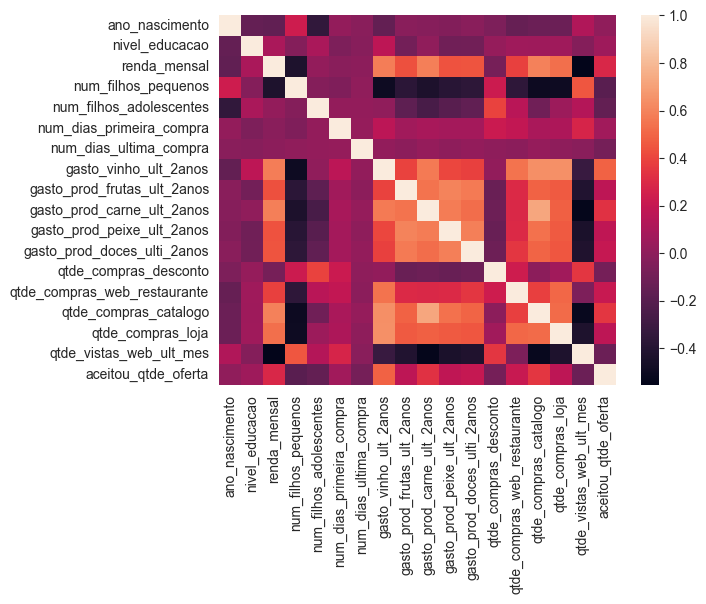

In [20]:
# Gerando o mapa de calor
sns.heatmap(df_scaled.corr(), annot=False);

## Atividade 4: Há um grupo de variáveis que trazem informações muito parecidas e possuem correlação entre si. Transforme todas essas variáveis em uma única.

In [22]:
# Reunindo as colunas de gastos em uma coluna de gastos totais
df_scaled['gasto_total'] = df_scaled[['gasto_prod_carne_ult_2anos','gasto_prod_doces_ulti_2anos', 'gasto_prod_frutas_ult_2anos', 'gasto_prod_peixe_ult_2anos', 'gasto_vinho_ult_2anos']].sum(axis=1)

#Visualizando a nova coluna
df_scaled['gasto_total'].head()

0   -3.561725
1    4.066923
2   -3.610208
3   -3.583865
4   -3.310823
Name: gasto_total, dtype: float64

In [23]:
# Eliminando as colunas de gastos
df_scaled.drop(['gasto_prod_carne_ult_2anos','gasto_prod_doces_ulti_2anos', 'gasto_prod_frutas_ult_2anos', 'gasto_prod_peixe_ult_2anos', 'gasto_vinho_ult_2anos'], axis=1, inplace=True)

# Visualizando dataframe
df_scaled.head()

,ano_nascimento,nivel_educacao,renda_mensal,num_filhos_pequenos,num_filhos_adolescentes,num_dias_primeira_compra,num_dias_ultima_compra,qtde_compras_desconto,qtde_compras_web_restaurante,qtde_compras_catalogo,qtde_compras_loja,qtde_vistas_web_ult_mes,aceitou_qtde_oferta,gasto_total
0,0.183962,-0.819614,-2.010675,-0.826459,-0.929785,-1.541122,0.547625,6.562937,-1.469078,-0.910659,-1.779682,6.056590,-0.501375,-3.561725
1,0.851858,-0.819614,-1.982125,1.030790,-0.929785,0.919043,-0.246892,6.562937,-1.469078,8.678058,-1.779682,-1.781003,-0.501375,4.066923
2,0.350936,-0.819614,-1.940113,1.030790,-0.929785,0.438890,0.236727,-1.202564,-1.469078,-0.910659,-1.779682,3.581561,-0.501375,-3.610208
3,-0.483933,1.530950,-1.919366,1.030790,0.906787,-1.719323,-0.695967,6.562937,-1.469078,-0.910659,-1.779682,5.644085,-0.501375,-3.583865
4,0.016989,-0.819614,-1.903240,-0.826459,0.906787,-0.427365,-1.697749,-1.202564,7.526593,-0.910659,-1.779682,-1.781003,-0.501375,-3.310823


## Atividade 5: Faça e teste de esfericidade de Bartlett e conclua se as variáveis estão correlacionadas.

Para realizar esse teste em `Python` usaremos a função `calculate_bartlett_sphericity` do pacote `factor_analyzer`.

**Atenção!** Este pacote não vem instalado por padrão! Para instalá-lo use o comando `!pip install factor_analyzer`.

A função que desejamos está no pacote `factor_analyzer` dentro do módulo `factor_analyzer`.

Para mais detalhes consulte a documentação do pacote [aqui](https://factor-analyzer.readthedocs.io/en/latest/index.html).

Está função retornará para nós dois valores: a estatística qui quadrado do teste e o p-valor. Consideraremos um nível de significância de 5%.

In [24]:
# Aplicando o teste de esfericidade de Bartlett
chi_sqr, p_value = calculate_bartlett_sphericity(df_scaled)

significance_level = 0.05

print(f'p-valor: {p_value} | nível de significância: {significance_level}')

if p_value < significance_level:
    print('p-valor é menor que o nível de significância. Conclusão: Pode-se rejeitar a hipótese nula')
else:
    print('p-valor é maior ou igual ao nível de significância. Conclusão: Não se pode rejeitar a hipótese nula')

p-valor: 0.0 | nível de significância: 0.05
p-valor é menor que o nível de significância. Conclusão: Pode-se rejeitar a hipótese nula


## Atividade 6: Obtenha a medida de Kaiser-Meyer-Olkin e conclua se a análise fatorial é indicada.

Pequenos valores de KMO indicam que as correlações entre os pares de variáveis não podem ser explicadas por outras variáveis, indicando que a análise fatorial não é adequada.
KMO sempre varia entre 0 e 1, quanto maior melhor. Resultados abaixo de 0.5 indicam que análise fatorial não é adequada.

In [25]:
# Aplicando a medida KMO
kmo_all, kmo_model = calculate_kmo(df_scaled)

kmo_min = 0.5

if kmo_model > kmo_min:
    print(f'KMO: {round(kmo_model,2)} | KMO é maior que o mínimo aceitável de {kmo_min}. Conclusão: Análise fatorial é indicada')
else:
    print(f'KMO: {round(kmo_model,2)} | KMO é menor que o mínimo aceitável de {kmo_min}. Conclusão: Análise fatorial não é indicada')

KMO: 0.8 | KMO é maior que o mínimo aceitável de 0.5. Conclusão: Análise fatorial é indicada


## Atividade 7: Encontre o número adequado de fatores para este problema.

Para isso vamos usar a função `FactorAnalyzer` e o método `get_eigenvalues()` aplicado ao um objeto da classe `FactorAnalyzer`, após este calcular valores dos dados.

O método `get_eigenvalues()` retorna dois objetos, sendo que o primeiro são os autovalores.

In [26]:
# Iniciando a Análise Fatorial Exploratória

# Criando um objeto da classe FactorAnalyzer
fa = factor_analyzer.FactorAnalyzer()

# Aplicando a análise fatorial ao dataset
fa.fit(df_scaled)

# Obtendo e visualizando os autovalores
ev, _ = fa.get_eigenvalues()
print(ev)

[4.18436633 1.89997857 1.42550194 1.07815787 0.9388788  0.85277554
 0.77659747 0.64116277 0.53982234 0.47018687 0.41318739 0.31059342
 0.26591489 0.20287578]


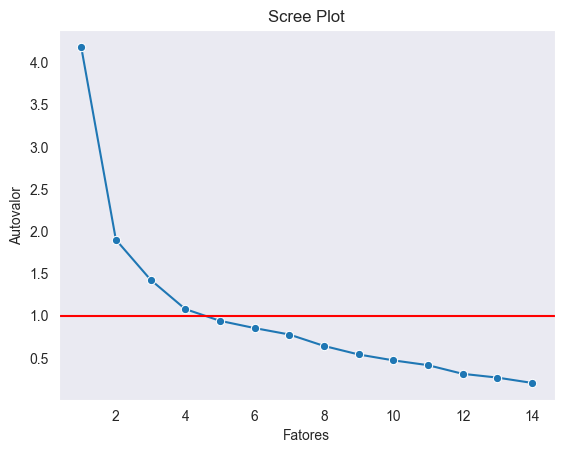

Número de fatores: 4


In [27]:
# Gerando o scree plot
sns.lineplot(x=range(1,df_scaled.shape[1]+1), y=ev, marker='o')
plt.title('Scree Plot')
plt.xlabel('Fatores')
plt.ylabel('Autovalor')
plt.axhline(y=1, color='r', linestyle='-')
plt.grid()
plt.show()

# Número de fatores com autovalor maior que 1
n_factors = sum(ev > 1)

print(f'Número de fatores: {n_factors}')

## Atividade 8: Calcule a variância explicada acumulada.

Para isso vamos usar o método `get_factor_variance()` aplicado ao nosso objetivo usado na realizaação da análise fatorial.

In [28]:
# Calculando as variâncias explicadas

# Realizando a análise fatorial com o número de fatores adequado
fa = factor_analyzer.FactorAnalyzer(n_factors=n_factors, rotation=None)
fa.fit(df_scaled)

# Obtendo as variâncias explicadas
variances = fa.get_factor_variance()

# Criando os rótulos das colunas
column_labels = [f'Fator {i}' for i in range(1, n_factors+1)]

# Criando e visualizando novo dataframe com as linhas 'Variância', 'Variância %' e 'Variância % Acumulada'
df_var = pd.DataFrame(variances, index=['Variância', 'Variância %', 'Variância % Acumulada'], columns=column_labels)
df_var

,Fator 1,Fator 2,Fator 3,Fator 4
Variância,3.835453,1.624185,0.885273,0.514557
Variância %,0.273961,0.116013,0.063234,0.036754
Variância % Acumulada,0.273961,0.389974,0.453208,0.489962


## Atividade 9: Rotacione os fatores.

Como estamos trabalhando com fatores que influenciam cliente, é interessante não ter um número muito grande, por isso vamos usar 4 fatores na análise a seguir.

Esse processo pode ser feito de forma simples ao passar para a função `FactorAnalyzer()` os parâmetros de interesse, que no nosso caso são `n_factors` e `rotation='varimax`.

Após expor nosso objeto aos dados, vamos acessar o atributo `loadinds_` que possui as cargas fatoriais.

In [30]:
# Rotacionando os fatores

# Realizando a análise fatorial com o número de fatores adequado e com o método de rotação varimax (rotação oblíqua)
fa = factor_analyzer.FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df_scaled)

# Obtendo as cargas fatoriais
loadings = fa.loadings_

# Visualizando as cargas fatoriais
df_loadings = pd.DataFrame(loadings, index=df_scaled.columns, columns=column_labels)
df_loadings

,Fator 1,Fator 2,Fator 3,Fator 4
ano_nascimento,-0.117861,0.014419,-0.524567,0.053416
nivel_educacao,0.037270,0.000445,0.193881,-0.038765
renda_mensal,0.712859,-0.024349,0.144167,-0.148660
num_filhos_pequenos,-0.613758,0.227129,-0.265408,-0.001353
num_filhos_adolescentes,-0.130555,0.278138,0.694905,0.016196
num_dias_primeira_compra,0.118682,0.163559,-0.036055,0.404641
num_dias_ultima_compra,-0.002768,0.016057,0.016756,-0.028478
qtde_compras_desconto,-0.060949,0.970169,0.156286,0.166736
qtde_compras_web_restaurante,0.541471,0.180678,0.245599,0.314185
qtde_compras_catalogo,0.798147,0.030006,-0.007483,-0.047472


## Atividade 10: Obtenha a relação de cada fator com as variáveis que ele está influenciando.

Cargas fatoriais indicam quanto um fator explica uma variável. Esses valores variam de -1 a 1. Quanto mais próximo de -1 ou de 1, mais o fator explica a variável.

Vamos estabelecer um valor de corte para poder entender quais fatores explicam quais variáveis. Vamos considerar que esse valor de corte será 0.5.

In [31]:
# Criando um dicionário com os fatores como chaves e as variáveis com carga fatorial acima de 0.5 como seus respectivos valores
factor_dictionary = {}

for i in range(n_factors):
    factor_dictionary[f'Fator {i+1}'] = df_scaled.columns[abs(loadings[:, i]) >= 0.5].tolist()

factor_dictionary

{'Fator 1': ['renda_mensal',
  'num_filhos_pequenos',
  'qtde_compras_web_restaurante',
  'qtde_compras_catalogo',
  'qtde_compras_loja',
  'qtde_vistas_web_ult_mes',
  'gasto_total'],
 'Fator 2': ['qtde_compras_desconto'],
 'Fator 3': ['ano_nascimento', 'num_filhos_adolescentes'],
 'Fator 4': ['qtde_vistas_web_ult_mes']}

## Atividade 11: Encontre um nome que represente cada fator.

## Fatores encontrados

Fator 1: Comportamento de Consumo
Fator 2: Preferência por Descontos
Fator 3: Demográfico e Familiar
Fator 4: Engajamento Online